<a href="https://colab.research.google.com/github/Mael-zys/StyleGan-and-InterFaceGAN/blob/main/FAN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# the directory of FAN-classifier, for example 'FaceAttribute/FaceAttribute/'
FAN = None
assert FAN is not None, "[!] Enter the folder name."

# the directory of StyleGan, for example 'stylegan-master/'
StyleGan = None
assert StyleGan is not None, "[!] Enter the folder name."

# move results of stylegan to the FAN
!mv -f /content/drive/My\ Drive/$StyleGan/results/* /content/drive/My\ Drive/$FAN/data/demo

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FAN))

%cd /content/drive/My\ Drive/$FAN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/FaceAttribute/FaceAttribute


# environment

In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2021-06-19 16:03:49--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-06-19 16:03:49--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh.6’

     0K .......... .......... .......... .......... ..........  0% 3.73M 15s
    50K .......... .......... .......... .......... .......... 

In [ ]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following NEW packages will be INSTALLED:

    _libgcc_mutex:          0.1-main               
    _openmp_mutex:          4.5-1_gnu              
    brotlipy:               0.7.0-py36h27cfd23_1003
    conda-package-handling: 1.7.3-py36h27cfd23_1   
    ld_impl_linux-64:       2.35.1-h7274673_9      
    libgomp:                9.3.0-h5101ec6_17      
    tqdm:                   4.59.0-pyhd3eb1b0_1    

The following packages will be UPDATED:

    ca-certificates:        2018.03.07-0            --> 2021.5.25-h06a4308_1    
    certifi:                2018.4.16-py36_0        --> 2021.5.30-py36h06a4308_0
    cffi:                   1.11.5-py36h9745a5d_0   --> 1.14.5-py36h261ae71_0   
    chardet:                3.0.4-py36h0f667ec_1    --> 4.0.0-py36h06a4308_1003 
    conda:                  4.5.4-py36_0            --> 4.10.1-py36h0

In [ ]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))

In [ ]:
!conda install caffe-gpu --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local



# interpolation

In [ ]:
import numpy as np

alpha_list = np.linspace(0, 1.0, num=21, endpoint=True)
# alpha_list = np.linspace(-3.0, 3.0, num=61)
f = open('./data/demo/list/demo.list', 'w')

for alpha in alpha_list:
  f.write('./demo/interpolation'+str(alpha)+'.png\n')
f.close()

In [ ]:
!sh demo_single_path.sh

Namespace(attr_num='40', caffemodel_path='./outputs/single_path_resnet_celeba.caffemodel', feature_layer='pred', gpu='0', mean_file='./data/pretrained/ResNet_mean.binaryproto', pred_file='./result/demo_result.list', prototxt_path='./outputs/deploy_single.prototxt', root_folder='./data', test_file='./data/demo/list/demo.list')
W0619 16:07:54.515522  3922 _caffe.cpp:139] DEPRECATION WARNING - deprecated use of Python interface
W0619 16:07:54.515588  3922 _caffe.cpp:140] Use this instead (with the named "weights" parameter):
W0619 16:07:54.515595  3922 _caffe.cpp:142] Net('./outputs/deploy_single.prototxt', 1, weights='./outputs/single_path_resnet_celeba.caffemodel')
I0619 16:07:54.937484  3922 upgrade_proto.cpp:67] Attempting to upgrade input file specified using deprecated input fields: ./outputs/deploy_single.prototxt
I0619 16:07:54.937572  3922 upgrade_proto.cpp:70] Successfully upgraded file specified using deprecated input fields.
W0619 16:07:54.937584  3922 upgrade_proto.cpp:72] No

In [ ]:
f = open('./result/demo_result.list', 'r')

attr_list = []
for line in f.readlines():
    line = line.strip() 
    attr = line.split(' ')
    attr.pop(0)
    attr_list.append(attr)
f.close()

In [ ]:
temp = np.array(attr_list,dtype=float)

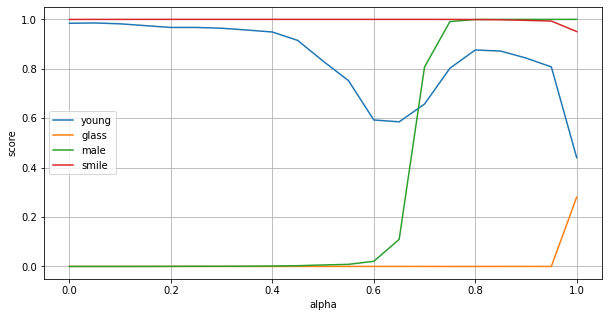

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(alpha_list,temp[:,-1])
plt.plot(alpha_list,temp[:,15])
plt.plot(alpha_list,temp[:,20])
plt.plot(alpha_list,temp[:,31])
plt.grid()
plt.legend(['young','glass','male','smile'])

# age

In [ ]:
import numpy as np

alpha_list = np.linspace(-3.0, 3.0, num=61, endpoint=True)
f = open('./data/demo/list/demo.list', 'w')

for alpha in alpha_list:
  f.write('./demo/age'+str(alpha)+'.png\n')
f.close()

In [ ]:
!sh demo_single_path.sh

Namespace(attr_num='40', caffemodel_path='./outputs/single_path_resnet_celeba.caffemodel', feature_layer='pred', gpu='0', mean_file='./data/pretrained/ResNet_mean.binaryproto', pred_file='./result/demo_result.list', prototxt_path='./outputs/deploy_single.prototxt', root_folder='./data', test_file='./data/demo/list/demo.list')
W0619 16:08:41.566171  3942 _caffe.cpp:139] DEPRECATION WARNING - deprecated use of Python interface
W0619 16:08:41.566229  3942 _caffe.cpp:140] Use this instead (with the named "weights" parameter):
W0619 16:08:41.566236  3942 _caffe.cpp:142] Net('./outputs/deploy_single.prototxt', 1, weights='./outputs/single_path_resnet_celeba.caffemodel')
I0619 16:08:41.576157  3942 upgrade_proto.cpp:67] Attempting to upgrade input file specified using deprecated input fields: ./outputs/deploy_single.prototxt
I0619 16:08:41.576246  3942 upgrade_proto.cpp:70] Successfully upgraded file specified using deprecated input fields.
W0619 16:08:41.576261  3942 upgrade_proto.cpp:72] No

In [ ]:
f = open('./result/demo_result.list', 'r')

attr_list = []
for line in f.readlines():
    line = line.strip() 
    attr = line.split(' ')
    attr.pop(0)
    attr_list.append(attr)
f.close()

In [ ]:
print(attr_list)

[['0.0056933635', '0.46765143', '0.126342', '0.04546699', '0.011599833', '0.0001751582', '0.6359191', '0.73345137', '0.15142134', '0.010101606', '0.00023361862', '0.007813933', '0.01516914', '0.6603521', '0.07455391', '8.363313e-05', '0.0004272716', '0.0025838409', '0.07466105', '0.0824828', '0.58279955', '0.010232852', '0.0022694706', '0.009937337', '0.9957155', '0.3531592', '3.2682942e-06', '0.006308521', '0.96388584', '0.016519684', '0.000101919475', '0.019332897', '0.06100928', '0.021338504', '0.24297592', '0.00014708468', '0.12073372', '0.007576144', '0.077201426', '0.93315184'], ['0.0071249884', '0.5044029', '0.09685028', '0.05450328', '0.0123944655', '0.00013805125', '0.62779963', '0.80053633', '0.15957618', '0.009093791', '0.00022125669', '0.0073285215', '0.017572464', '0.7260314', '0.10760994', '9.8198565e-05', '0.00040408561', '0.0025695604', '0.061448902', '0.109057546', '0.62941504', '0.011012383', '0.0022275874', '0.011137688', '0.9957584', '0.33326465', '2.6169373e-06', '

In [ ]:
temp = np.array(attr_list,dtype=float)

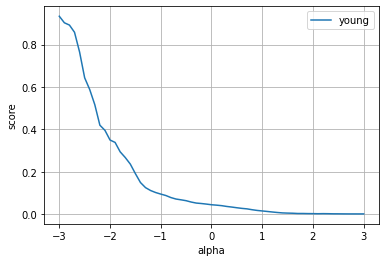

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(alpha_list,temp[:,-1])
plt.legend(['young'])
plt.grid()

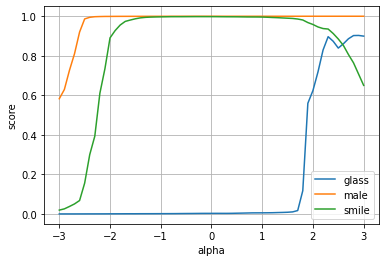

In [ ]:
plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(alpha_list,temp[:,15])
plt.plot(alpha_list,temp[:,20])
plt.plot(alpha_list,temp[:,31])
plt.legend(['glass','male','smile'])
plt.grid()

# glass

In [ ]:
import numpy as np

# alpha_list = np.linspace(0, 1.0, num=21, endpoint=True)
alpha_list = np.linspace(-2.0, 0, num=201, endpoint=True)
f = open('./data/demo/list/demo.list', 'w')

for alpha in alpha_list:
  f.write('./demo/glass'+str(alpha)+'.png\n')
f.close()

In [ ]:
!sh demo_single_path.sh

Namespace(attr_num='40', caffemodel_path='./outputs/single_path_resnet_celeba.caffemodel', feature_layer='pred', gpu='0', mean_file='./data/pretrained/ResNet_mean.binaryproto', pred_file='./result/demo_result.list', prototxt_path='./outputs/deploy_single.prototxt', root_folder='./data', test_file='./data/demo/list/demo.list')
W0619 16:09:58.260195  3963 _caffe.cpp:139] DEPRECATION WARNING - deprecated use of Python interface
W0619 16:09:58.260253  3963 _caffe.cpp:140] Use this instead (with the named "weights" parameter):
W0619 16:09:58.260259  3963 _caffe.cpp:142] Net('./outputs/deploy_single.prototxt', 1, weights='./outputs/single_path_resnet_celeba.caffemodel')
I0619 16:09:58.269886  3963 upgrade_proto.cpp:67] Attempting to upgrade input file specified using deprecated input fields: ./outputs/deploy_single.prototxt
I0619 16:09:58.269965  3963 upgrade_proto.cpp:70] Successfully upgraded file specified using deprecated input fields.
W0619 16:09:58.269980  3963 upgrade_proto.cpp:72] No

In [ ]:
f = open('./result/demo_result.list', 'r')

attr_list = []
for line in f.readlines():
    line = line.strip() 
    attr = line.split(' ')
    attr.pop(0)
    attr_list.append(attr)
f.close()

In [ ]:
temp = np.array(attr_list,dtype=float)

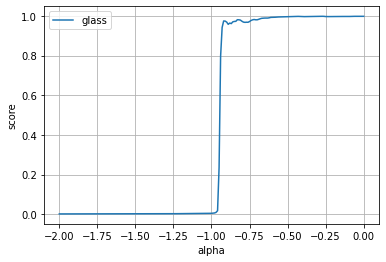

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(alpha_list,temp[:,15])
plt.legend(['glass'])
plt.grid()

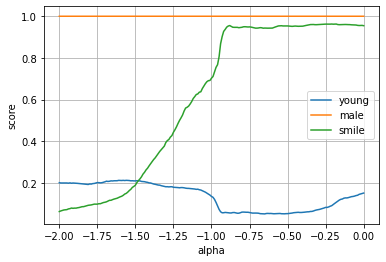

In [ ]:
plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(alpha_list,temp[:,-1])
plt.plot(alpha_list,temp[:,20])
plt.plot(alpha_list,temp[:,31])
plt.legend(['young','male','smile'])
plt.grid()

# male

In [ ]:
import numpy as np

alpha_list = np.linspace(-3.0, 3.0, num=31, endpoint=True)
f = open('./data/demo/list/demo.list', 'w')

for alpha in alpha_list:
  f.write('./demo/male'+str(alpha)+'.png\n')
f.close()

In [ ]:
!sh demo_single_path.sh

Namespace(attr_num='40', caffemodel_path='./outputs/single_path_resnet_celeba.caffemodel', feature_layer='pred', gpu='0', mean_file='./data/pretrained/ResNet_mean.binaryproto', pred_file='./result/demo_result.list', prototxt_path='./outputs/deploy_single.prototxt', root_folder='./data', test_file='./data/demo/list/demo.list')
W0619 16:13:44.727044  4020 _caffe.cpp:139] DEPRECATION WARNING - deprecated use of Python interface
W0619 16:13:44.727099  4020 _caffe.cpp:140] Use this instead (with the named "weights" parameter):
W0619 16:13:44.727104  4020 _caffe.cpp:142] Net('./outputs/deploy_single.prototxt', 1, weights='./outputs/single_path_resnet_celeba.caffemodel')
I0619 16:13:44.736490  4020 upgrade_proto.cpp:67] Attempting to upgrade input file specified using deprecated input fields: ./outputs/deploy_single.prototxt
I0619 16:13:44.736562  4020 upgrade_proto.cpp:70] Successfully upgraded file specified using deprecated input fields.
W0619 16:13:44.736575  4020 upgrade_proto.cpp:72] No

In [ ]:
f = open('./result/demo_result.list', 'r')

attr_list = []
for line in f.readlines():
    line = line.strip() 
    attr = line.split(' ')
    attr.pop(0)
    attr_list.append(attr)
f.close()

In [ ]:
print(attr_list)

[['2.6589243e-05', '0.09780068', '0.85177666', '0.002835792', '0.00013807701', '0.0009053777', '0.29212284', '0.0037682075', '0.0042546038', '0.020199507', '0.00022248668', '0.44143632', '0.016140558', '0.0006654174', '0.00045101834', '0.00015127813', '8.221713e-05', '2.2507102e-05', '0.98232836', '0.94176227', '7.342779e-06', '0.89911276', '0.00012512706', '0.854468', '0.999873', '0.21979147', '0.00030783127', '0.60707694', '0.0047229584', '0.14681825', '7.3245435e-05', '0.9954003', '0.93474555', '0.044282425', '0.04555707', '0.00020193565', '0.9994807', '0.09920147', '0.00014467517', '0.9801295'], ['3.075933e-05', '0.11392276', '0.8713362', '0.004417573', '0.00013117788', '0.00071860244', '0.2752657', '0.004998709', '0.0039353617', '0.014888536', '0.00016011577', '0.50304353', '0.023149777', '0.00072276953', '0.00056282093', '0.00015308117', '8.345164e-05', '1.8410661e-05', '0.98372114', '0.9649991', '7.3460014e-06', '0.95234334', '0.00012353997', '0.8543075', '0.99985754', '0.251923

In [ ]:
temp = np.array(attr_list,dtype=float)

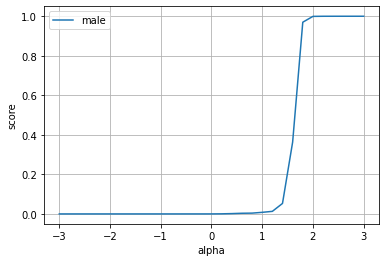

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(alpha_list,temp[:,20])
plt.legend(['male'])
plt.grid()

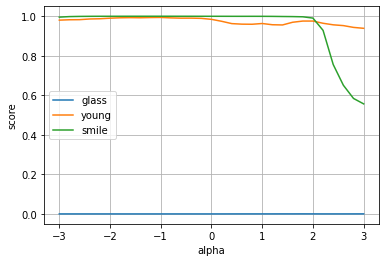

In [ ]:
plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(alpha_list,temp[:,15])
plt.plot(alpha_list,temp[:,-1])
plt.plot(alpha_list,temp[:,31])
plt.legend(['glass','young','smile'])
plt.grid()

# smile

In [ ]:
import numpy as np

alpha_list = np.linspace(-3.0, 3.0, num=31, endpoint=True)
f = open('./data/demo/list/demo.list', 'w')

for alpha in alpha_list:
  f.write('./demo/smile'+str(alpha)+'.png\n')
f.close()

In [ ]:
!sh demo_single_path.sh

Namespace(attr_num='40', caffemodel_path='./outputs/single_path_resnet_celeba.caffemodel', feature_layer='pred', gpu='0', mean_file='./data/pretrained/ResNet_mean.binaryproto', pred_file='./result/demo_result.list', prototxt_path='./outputs/deploy_single.prototxt', root_folder='./data', test_file='./data/demo/list/demo.list')
W0619 16:14:20.961488  4035 _caffe.cpp:139] DEPRECATION WARNING - deprecated use of Python interface
W0619 16:14:20.961542  4035 _caffe.cpp:140] Use this instead (with the named "weights" parameter):
W0619 16:14:20.961547  4035 _caffe.cpp:142] Net('./outputs/deploy_single.prototxt', 1, weights='./outputs/single_path_resnet_celeba.caffemodel')
I0619 16:14:20.970932  4035 upgrade_proto.cpp:67] Attempting to upgrade input file specified using deprecated input fields: ./outputs/deploy_single.prototxt
I0619 16:14:20.971024  4035 upgrade_proto.cpp:70] Successfully upgraded file specified using deprecated input fields.
W0619 16:14:20.971038  4035 upgrade_proto.cpp:72] No

In [ ]:
f = open('./result/demo_result.list', 'r')

attr_list = []
for line in f.readlines():
    line = line.strip() 
    attr = line.split(' ')
    attr.pop(0)
    attr_list.append(attr)
f.close()

In [ ]:
print(attr_list)

[['0.79795694', '0.00025608102', '0.017636769', '0.10332145', '0.57064366', '0.00010185701', '0.07778075', '0.41310164', '0.0011109663', '0.0004234947', '0.0012000715', '0.0016977999', '0.007906677', '0.39721793', '0.17025441', '0.93186796', '0.68761396', '0.038724847', '6.4240066e-06', '0.06172515', '0.9999979', '0.0048796027', '0.45874614', '0.14533868', '0.00069061446', '0.047978424', '0.00083371263', '0.34390575', '0.12580338', '0.00068028516', '0.8371766', '0.22552074', '0.002855871', '0.0019161494', '0.0008098609', '0.0067417994', '2.7570699e-05', '0.0014983385', '0.23256098', '0.09637207'], ['0.8209851', '0.0002298865', '0.01773221', '0.09943156', '0.5595386', '9.2068076e-05', '0.08125747', '0.4216339', '0.0010653527', '0.00043205882', '0.0011888638', '0.0016602688', '0.007190325', '0.3863756', '0.17712346', '0.94792116', '0.6646242', '0.037863962', '6.151318e-06', '0.05356315', '0.9999979', '0.0045622773', '0.47764334', '0.14414527', '0.00068111974', '0.043228116', '0.000870910

In [ ]:
temp = np.array(attr_list,dtype=float)

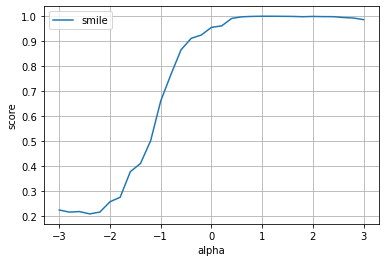

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(alpha_list,temp[:,31])
plt.legend(['smile'])
plt.grid()

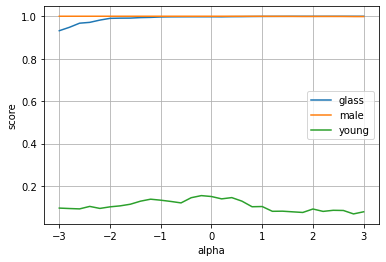

In [ ]:
plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(alpha_list,temp[:,15])
plt.plot(alpha_list,temp[:,20])
plt.plot(alpha_list,temp[:,-1])
plt.legend(['glass','male','young'])
plt.grid()